In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

from utils import PlotParams
plotter = PlotParams()
plotter.set_params()

In [2]:
RES_DIR = os.path.join(os.pardir, 'results_new')
SAVE_DIR = os.path.join(os.pardir, 'figs_new')
if not os.path.exists(SAVE_DIR):
    os.makedirs(SAVE_DIR)

In [3]:
df = pd.read_csv('figure1_info.csv')
df_test = pd.read_csv('figure1_info_test.csv')

### MNIST

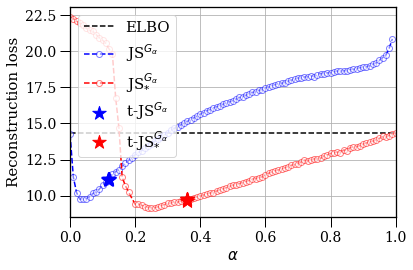

In [4]:
seeds = [0, 1, 2, 3, 4]
distortions = []
final_alphas = []
for seed in seeds:
    sub_dir = os.path.join(RES_DIR, f'mnist_tgjs_s-{seed}')
    train_losses = pd.read_csv(os.path.join(sub_dir, 'train_losses.log'))
    distortions.append(train_losses.loc[train_losses['Loss'] == 'recon_loss']['Value'].iloc[-1])
    final_alphas.append(train_losses.loc[train_losses['Loss'] == 'alpha']['Value'].iloc[-1])

train_losses = pd.read_csv(os.path.join(RES_DIR, 'mnist_kl_b-1.0', 'train_losses.log'))
kl_recon = train_losses.loc[train_losses['Loss'] == 'recon_loss']['Value'].iloc[-1]
plt.axhline(kl_recon, color='k', ls='--', label='ELBO')

df_subset = df.loc[(df['Dataset'] == 'mnist') & (df['Divergence'] == 'GJS') & (df['Epochs'] == 100)]
plt.plot(df_subset['alpha'], df_subset['Reconstruction Loss'], 'bo--', markerfacecolor=(1, 1, 1, 0.5), label=r'JS$^{G_{\alpha}}$')

plt.scatter(final_alphas, distortions, color='b', marker='*', s=200, zorder=10, label=r't-JS$^{G_{\alpha}}$')

distortions = []
final_alphas = []
for seed in seeds:
    sub_dir = os.path.join(RES_DIR, f'mnist_tdgjs_s-{seed}')
    train_losses = pd.read_csv(os.path.join(sub_dir, 'train_losses.log'))
    distortions.append(train_losses.loc[train_losses['Loss'] == 'recon_loss']['Value'].iloc[-1])
    final_alphas.append(train_losses.loc[train_losses['Loss'] == 'alpha']['Value'].iloc[-1])

df_subset = df.loc[(df['Dataset'] == 'mnist') & (df['Divergence'] == 'dGJS') & (df['Epochs'] == 100)]
plt.plot(df_subset['alpha'], df_subset['Reconstruction Loss'], 'ro--', markerfacecolor=(1, 1, 1, 0.5), label=r'JS$^{G_{\alpha}}_{*}$')

plt.scatter(final_alphas, distortions, color='r', marker='*', s=200, zorder=10, label=r't-JS$^{G_{\alpha}}_{*}$')

plt.xlim(0, 1)
plt.xlabel(r'$\alpha$')
plt.ylabel('Reconstruction loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

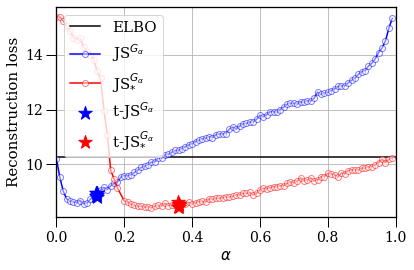

In [5]:
seeds = [0, 1, 2, 3, 4]
distortions = []
final_alphas = []
for seed in seeds:
    sub_dir = os.path.join(RES_DIR, f'mnist_tgjs_s-{seed}')
    train_losses = pd.read_csv(os.path.join(sub_dir, 'train_losses.log'))
    with open(os.path.join(sub_dir, 'test_eval.log')) as f:
        test_losses = json.load(f)
    distortions.append(test_losses['recon_loss'])
    final_alphas.append(train_losses.loc[train_losses['Loss'] == 'alpha']['Value'].iloc[-1])

# train_losses = pd.read_csv(os.path.join(RES_DIR, 'mnist_kl_b-1.0', 'train_losses.log'))
with open(os.path.join(RES_DIR, 'mnist_kl_b-1.0', 'test_eval.log')) as f:
    test_losses = json.load(f)
# kl_recon = train_losses.loc[train_losses['Loss'] == 'recon_loss']['Value'].iloc[-1]
plt.axhline(test_losses['recon_loss'], color='k', ls='-', label='ELBO')

df_subset = df_test.loc[(df_test['Dataset'] == 'mnist') & (df_test['Divergence'] == 'GJS') & (df_test['Epochs'] == 100)]
plt.plot(df_subset['alpha'], df_subset['Reconstruction Loss'], 'bo-', markerfacecolor=(1, 1, 1, 0.5), label=r'JS$^{G_{\alpha}}$')

plt.scatter(final_alphas, distortions, color='b', marker='*', s=200, zorder=10, label=r't-JS$^{G_{\alpha}}$')

distortions = []
final_alphas = []
for seed in seeds:
    sub_dir = os.path.join(RES_DIR, f'mnist_tdgjs_s-{seed}')
    train_losses = pd.read_csv(os.path.join(sub_dir, 'train_losses.log'))
    with open(os.path.join(sub_dir, 'test_eval.log')) as f:
        test_losses = json.load(f)
    distortions.append(test_losses['recon_loss'])
    final_alphas.append(train_losses.loc[train_losses['Loss'] == 'alpha']['Value'].iloc[-1])

df_subset = df_test.loc[(df_test['Dataset'] == 'mnist') & (df_test['Divergence'] == 'dGJS') & (df_test['Epochs'] == 100)]
plt.plot(df_subset['alpha'], df_subset['Reconstruction Loss'], 'ro-', markerfacecolor=(1, 1, 1, 0.5), label=r'JS$^{G_{\alpha}}_{*}$')

plt.scatter(final_alphas, distortions, color='r', marker='*', s=200, zorder=10, label=r't-JS$^{G_{\alpha}}_{*}$')

plt.xlim(0, 1)
plt.xlabel(r'$\alpha$')
plt.ylabel('Reconstruction loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.savefig(os.path.join(SAVE_DIR, 'fig1_mnist.pdf'))
plt.show()

### Fashion

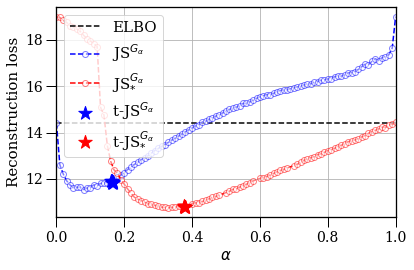

In [6]:
seeds = [0, 1, 2, 3, 4]
distortions = []
final_alphas = []
for seed in seeds:
    sub_dir = os.path.join(RES_DIR, f'fashion_tgjs_s-{seed}')
    train_losses = pd.read_csv(os.path.join(sub_dir, 'train_losses.log'))
    distortions.append(train_losses.loc[train_losses['Loss'] == 'recon_loss']['Value'].iloc[-1])
    final_alphas.append(train_losses.loc[train_losses['Loss'] == 'alpha']['Value'].iloc[-1])

train_losses = pd.read_csv(os.path.join(RES_DIR, 'fashion_kl_b-1.0', 'train_losses.log'))
kl_recon = train_losses.loc[train_losses['Loss'] == 'recon_loss']['Value'].iloc[-1]
plt.axhline(kl_recon, color='k', ls='--', label='ELBO')

plt.scatter(final_alphas, distortions, color='b', marker='*', s=200, zorder=10, label=r't-JS$^{G_{\alpha}}$')

df_subset = df.loc[(df['Dataset'] == 'fashion') & (df['Divergence'] == 'GJS') & (df['Epochs'] == 100)]
plt.plot(df_subset['alpha'], df_subset['Reconstruction Loss'], 'bo--', markerfacecolor=(1, 1, 1, 0.5), label=r'JS$^{G_{\alpha}}$')

distortions = []
final_alphas = []
for seed in seeds:
    sub_dir = os.path.join(RES_DIR, f'fashion_tdgjs_s-{seed}')
    train_losses = pd.read_csv(os.path.join(sub_dir, 'train_losses.log'))
    distortions.append(train_losses.loc[train_losses['Loss'] == 'recon_loss']['Value'].iloc[-1])
    final_alphas.append(train_losses.loc[train_losses['Loss'] == 'alpha']['Value'].iloc[-1])
plt.scatter(final_alphas, distortions, color='r', marker='*', s=200, zorder=10, label=r't-JS$^{G_{\alpha}}_{*}$')

df_subset = df.loc[(df['Dataset'] == 'fashion') & (df['Divergence'] == 'dGJS') & (df['Epochs'] == 100)]
plt.plot(df_subset['alpha'], df_subset['Reconstruction Loss'], 'ro--', markerfacecolor=(1, 1, 1, 0.5), label=r'JS$^{G_{\alpha}}_{*}$')

plt.xlim(0, 1)
plt.xlabel(r'$\alpha$')
plt.ylabel('Reconstruction loss')
plt.legend()
plt.grid()

plt.tight_layout()
# plt.savefig(os.path.join(SAVE_DIR, 'fig1_fashion.pdf'))
plt.show()

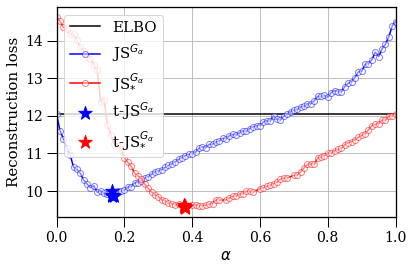

In [7]:
seeds = [0, 1, 2, 3, 4]
distortions = []
final_alphas = []
for seed in seeds:
    sub_dir = os.path.join(RES_DIR, f'fashion_tgjs_s-{seed}')
    train_losses = pd.read_csv(os.path.join(sub_dir, 'train_losses.log'))
    with open(os.path.join(sub_dir, 'test_eval.log')) as f:
        test_losses = json.load(f)
    distortions.append(test_losses['recon_loss'])
    final_alphas.append(train_losses.loc[train_losses['Loss'] == 'alpha']['Value'].iloc[-1])

with open(os.path.join(RES_DIR, 'fashion_kl_b-1.0', 'test_eval.log')) as f:
    test_losses = json.load(f)
plt.axhline(test_losses['recon_loss'], color='k', ls='-', label='ELBO')

df_subset = df_test.loc[(df_test['Dataset'] == 'fashion') & (df_test['Divergence'] == 'GJS') & (df_test['Epochs'] == 100)]
plt.plot(df_subset['alpha'], df_subset['Reconstruction Loss'], 'bo-', markerfacecolor=(1, 1, 1, 0.5), label=r'JS$^{G_{\alpha}}$')

plt.scatter(final_alphas, distortions, color='b', marker='*', s=200, zorder=10, label=r't-JS$^{G_{\alpha}}$')

distortions = []
final_alphas = []
for seed in seeds:
    sub_dir = os.path.join(RES_DIR, f'fashion_tdgjs_s-{seed}')
    train_losses = pd.read_csv(os.path.join(sub_dir, 'train_losses.log'))
    with open(os.path.join(sub_dir, 'test_eval.log')) as f:
        test_losses = json.load(f)
    distortions.append(test_losses['recon_loss'])
    final_alphas.append(train_losses.loc[train_losses['Loss'] == 'alpha']['Value'].iloc[-1])

df_subset = df_test.loc[(df_test['Dataset'] == 'fashion') & (df_test['Divergence'] == 'dGJS') & (df_test['Epochs'] == 100)]
plt.plot(df_subset['alpha'], df_subset['Reconstruction Loss'], 'ro-', markerfacecolor=(1, 1, 1, 0.5), label=r'JS$^{G_{\alpha}}_{*}$')

plt.scatter(final_alphas, distortions, color='r', marker='*', s=200, zorder=10, label=r't-JS$^{G_{\alpha}}_{*}$')

plt.xlim(0, 1)
plt.xlabel(r'$\alpha$')
plt.ylabel('Reconstruction loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.savefig(os.path.join(SAVE_DIR, 'fig1_fashion.pdf'))
plt.show()

### Convergence

In [8]:
datasets = ['mnist', 'fashion', 'dsprites', 'chairs', 'celeba']
for dset in datasets:
    final_alphas = []
    for seed in [0, 1, 2, 3]:
        sub_dir = os.path.join(RES_DIR, f'{dset}_tdgjs_s-{seed}')
        train_losses = pd.read_csv(os.path.join(sub_dir, 'train_losses.log'))
        final_alphas.append(train_losses.loc[train_losses['Loss'] == 'alpha']['Value'].iloc[-1])
    final_alphas = np.array(final_alphas)
    print(dset, final_alphas.mean(), final_alphas.std())

mnist 0.36020267754793167 0.00033129644571425085
fashion 0.3773917332291603 0.0018202743320903493
dsprites 0.3182812035083771 0.0009674468922779409
chairs 0.3646099269390106 0.0005068061358168747
celeba 0.30996738374233246 0.00032233641396903006


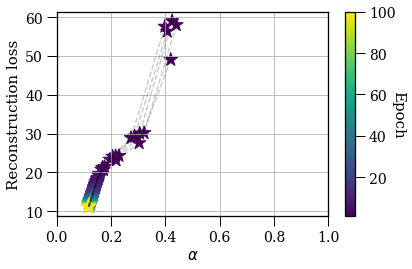

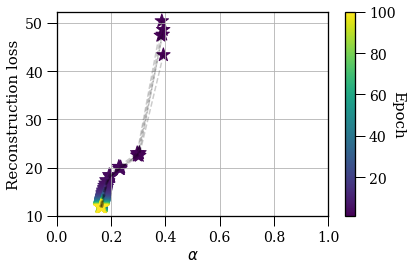

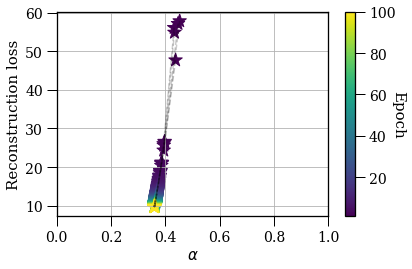

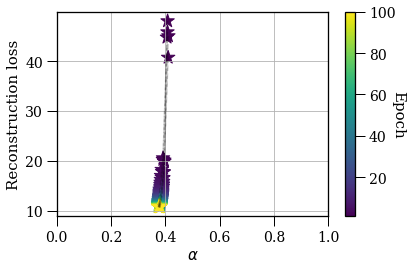

In [9]:
seeds = [0, 1, 2, 3, 4]
for div in ['tGJS', 'tdGJS']:
    for dset in ['mnist', 'fashion']:
        for seed in seeds:
            sub_dir = os.path.join(RES_DIR, f'{dset}_{div}_s-{seed}')
            train_losses = pd.read_csv(os.path.join(sub_dir, 'train_losses.log'))
            distortions = train_losses.loc[train_losses['Loss'] == 'recon_loss']['Value']
            alphas = train_losses.loc[train_losses['Loss'] == 'alpha']['Value']
            plt.plot(alphas, distortions, 'k--', alpha=0.2)
            plt.scatter(alphas, distortions, c=np.arange(1, 101), ls='-', marker='*', s=200)

        plt.xlim(0, 1)
        plt.xlabel(r'$\alpha$')
        plt.ylabel('Reconstruction loss')
        cbar = plt.colorbar()
        cbar.set_label('Epoch', rotation=270, labelpad=10)
        # plt.legend([f'{dset} {div}'])

        plt.tight_layout()
        plt.grid()
        plt.savefig(os.path.join(SAVE_DIR, f'seed_train_{dset}_{div}.pdf'))
        plt.show()